In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.set()

#download source
#https://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/historico/mercado-a-vista/series-historicas/
path_file='COTAHIST_A2020.TXT'

#layout details
## http://www.b3.com.br/data/files/33/67/B9/50/D84057102C784E47AC094EA8/SeriesHistoricas_Layout.pdf

features_size=[2,8,2,12,3,12,10,3,4,13,13,13,13,13,13,13,5,18,18,13,1,8,7,13,12,3]

b3_data=pd.read_fwf(path_file,widths=features_size, header=0)

#name set
b3_data.columns = [
"tipo_registro",
"data_pregao",
"cod_bdi",
"cod_negociacao",
"tipo_mercado",
"noma_empresa",
"especificacao_papel",
"prazo_dias_merc_termo",
"moeda_referencia",
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"numero_negocios",
"quantidade_papeis_negociados",
"volume_total_negociado",
"preco_exercicio",
"ìndicador_correcao_precos",
"data_vencimento" ,
"fator_cotacao",
"preco_exercicio_pontos",
"codigo_isin",
"num_distribuicao_papel"]

#drop last line
linha=len(b3_data["data_pregao"])
b3_data=b3_data.drop(linha-1)


listaVirgula=[
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"volume_total_negociado",
"preco_exercicio",
"preco_exercicio_pontos"
]

for column in listaVirgula:
    b3_data[column]=[i/100. for i in b3_data[column]]
    
b3_data.head()

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
0,1,20200102,2.0,AALR3,10,ALLIAR,ON NM,NaN,R$,18.29,...,2443.0,585800.0,10946196.0,0.0,0.0,99991231.0,1.0,0.0,BRAALRACNOR6,101.0
1,1,20200102,2.0,AAPL34,10,APPLE,DRN,NaN,R$,120.00,...,9.0,12700.0,1533380.0,0.0,0.0,99991231.0,1.0,0.0,BRAAPLBDR004,131.0
2,1,20200102,2.0,ABCB4,10,ABC BRASIL,PN EJ N2,NaN,R$,20.00,...,3979.0,870400.0,17457878.0,0.0,0.0,99991231.0,1.0,0.0,BRABCBACNPR4,133.0
3,1,20200102,2.0,ABEV3,10,AMBEV S/A,ON EJ,NaN,R$,18.86,...,31581.0,16011300.0,306234791.0,0.0,0.0,99991231.0,1.0,0.0,BRABEVACNOR1,122.0
4,1,20200102,2.0,ADHM3,10,ADVANCED-DH,ON,NaN,R$,2.55,...,307.0,193400.0,471927.0,0.0,0.0,99991231.0,1.0,0.0,BRADHMACNOR9,101.0


In [17]:
# Alguns tipos de mercado

# 10 - Mercado à vista
# 70 - Opções de Compra
# 80 - Opções de Venda

b3_data[b3_data['tipo_mercado']==70]

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
294508,1,20200102,78.0,ABEVA210,70,ABEV /EJ,ON,0.0,R$,0.04,...,72.0,750100.0,22794.0,20.58,0.0,20200120.0,1.0,0.0,BRABEVACNOR1,121.0
294509,1,20200102,78.0,ABEVC185,70,ABEV /EJ,ON,0.0,R$,1.47,...,1.0,300.0,441.0,18.08,0.0,20200316.0,1.0,0.0,BRABEVACNOR1,121.0
294510,1,20200102,78.0,ABEVC205,70,ABEV /EJ,ON,0.0,R$,0.36,...,8.0,6400.0,2299.0,20.08,0.0,20200316.0,1.0,0.0,BRABEVACNOR1,121.0
294511,1,20200102,78.0,ABEVA200,70,ABEV FM/EJ,ON,0.0,R$,0.14,...,180.0,917800.0,146653.0,19.58,0.0,20200120.0,1.0,0.0,BRABEVACNOR1,121.0
294512,1,20200102,78.0,ABEVA205,70,ABEV FM/EJ,ON,0.0,R$,0.07,...,85.0,200200.0,14266.0,20.08,0.0,20200120.0,1.0,0.0,BRABEVACNOR1,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251632,1,20201230,78.0,YDUQA340,70,YDUQ FM,ON NM,0.0,R$,0.94,...,4.0,1600.0,1400.0,34.00,0.0,20210118.0,1.0,0.0,BRYDUQACNOR3,101.0
1251633,1,20201230,78.0,YDUQA350,70,YDUQ FM,ON NM,0.0,R$,0.58,...,5.0,9100.0,4495.0,35.00,0.0,20210118.0,1.0,0.0,BRYDUQACNOR3,101.0
1251634,1,20201230,78.0,YDUQA360,70,YDUQ FM,ON NM,0.0,R$,0.42,...,13.0,138000.0,43412.0,36.00,0.0,20210118.0,1.0,0.0,BRYDUQACNOR3,101.0
1251635,1,20201230,78.0,YDUQA380,70,YDUQ,ON NM,0.0,R$,0.10,...,3.0,1400.0,153.0,38.00,0.0,20210118.0,1.0,0.0,BRYDUQACNOR3,101.0


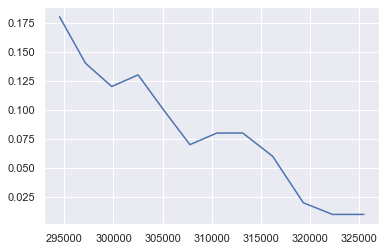

In [19]:
plt.plot(b3_data[(b3_data['tipo_mercado']==70)&(b3_data['cod_negociacao']=='ABEVA200')]['preco_ultimo_negocio'])

<font size="5">           
   ____________________________________________________________________________________________________
    
    Black and Scholes
$$C=N(d1)S_t - N(d2)Ke^{-rt}$$

$$d1=ln(\frac{S_t}{k}) + (r+ \frac{\sigma^2}{2}t)$$


$$d2=d1 - \sigma \sqrt(t)$$


    
C= call option price

N= CDF of normal distribution

St= spot price of an asset

K= strike price

r= risk-free interest rate

t= time to maturity

$\sigma$ = volatility
    
</font>

In [20]:

r = 0.01
S = 30
k = 40
T = 240/365
sigma= 0.3
from scipy.stats import norm

def blackScholes(r, S, k, T, sigma, type="C"):
    
    d1=(np.log(S/k)+ (r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2= d1- sigma*np.sqrt(T)

    if type=="C":
            price= S*norm.cdf(d1,0,1) - k*np.exp(-r*T)*norm.cdf(d2,0,1) #accumlative distribution function
            print("Call calculated")
    elif type =="P":
            price = k*np.exp(-r*T)*norm.cdf(-d2,0,1) - S*norm.cdf(-d1,0,1)
            print("Put calculated")
    return price

        

print("Black Shcoles Working:", round(blackScholes(r, S, k, T, sigma, type="C"),2))

print("Black Shcoles Working:", round(blackScholes(r, S, k, T, sigma, type="P"),2))

Call calculated
Black Shcoles Working: 0.51
Put calculated
Black Shcoles Working: 10.25
